Data Wrangling II
Create an Academic performance dataset of students and perform the
following operations using Python.
1. Scan all variables for missing values and inconsistencies. If
there are missing values and/or inconsistencies, use any of the
suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use
any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The
purpose of this transformation should be one of the following
reasons: to change the scale for better understanding of the
variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a
normal distribution.
Reason and document your approach properly.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df = df.rename(columns={
    "race/ethnicity": "race",
    "parental level of education": "parent_edu",
    "test preparation course": "test_course",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
})

In [4]:
# 1. Checking for null values
print("Null Values:\n", df.isnull().sum())

Null Values:
 gender           0
race             0
parent_edu       0
lunch            0
test_course      0
math_score       0
reading_score    0
writing_score    0
dtype: int64


## Outliers
- Definition: Data points that significantly differ from other observations.
- Detection Methods:
  - Boxplots (visual)
  - IQR Method:
    - Q1 = 25th percentile
    - Q3 = 75th percentile
    - IQR = Q3 - Q1
    - Outlier thresholds = Q1 - 1.5×IQR or Q3 + 1.5×IQR
- Treatment:
  - Remove outliers from data
  - In this practical, outliers in math, reading, and writing scores were removed.

## Boxplot
- A statistical plot that shows:
  - Minimum, Q1, Median, Q3, and Maximum
  - Outliers are shown as individual points
- Used for detecting outliers and understanding data distribution.


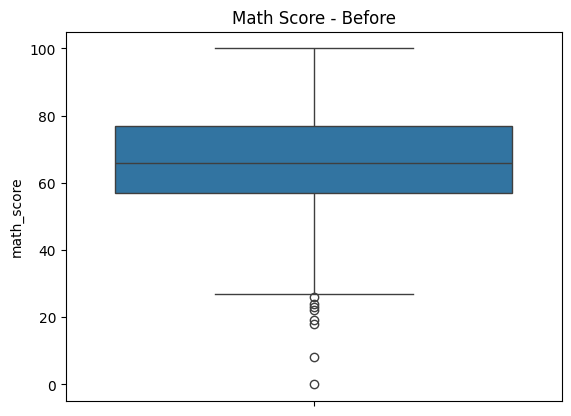

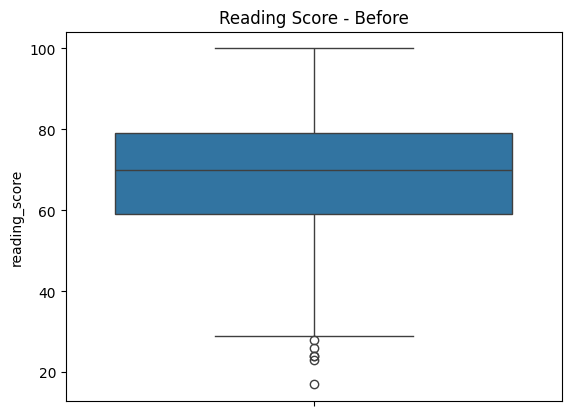

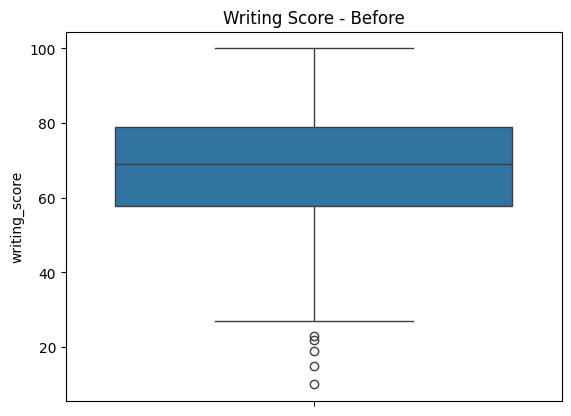

66.0


In [5]:
# 2. Outlier Detection – Before Removal (Boxplots)
sns.boxplot(data=df["math_score"], ).set_title("Math Score - Before")
plt.show()
sns.boxplot(data=df["reading_score"], ).set_title("Reading Score - Before")
plt.show()
sns.boxplot(data=df["writing_score"], ).set_title("Writing Score - Before")
plt.show()
print(df["math_score"].median())

In [7]:
# 3. Outlier Removal using IQR
def remove_outliers(feature):
    global df
    q1, q3 = np.percentile(df[feature], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]

remove_outliers("math_score")
remove_outliers("reading_score")
remove_outliers("writing_score")

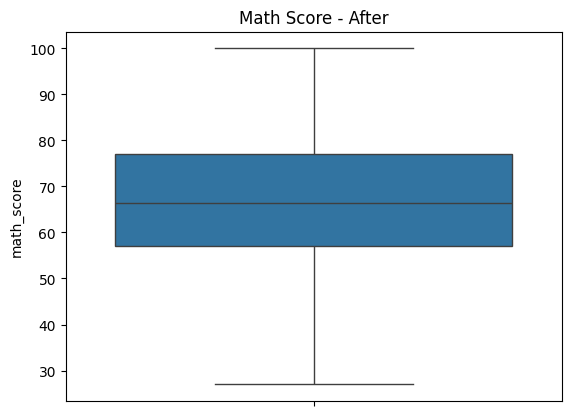

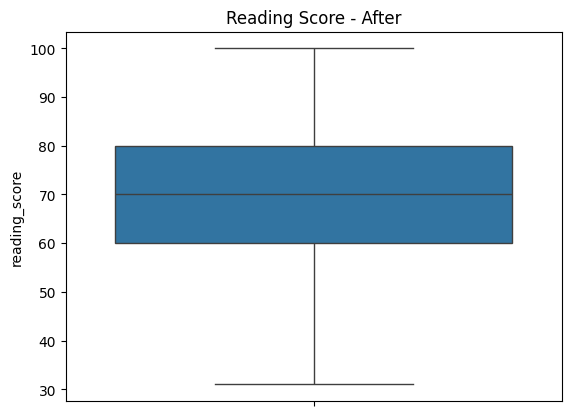

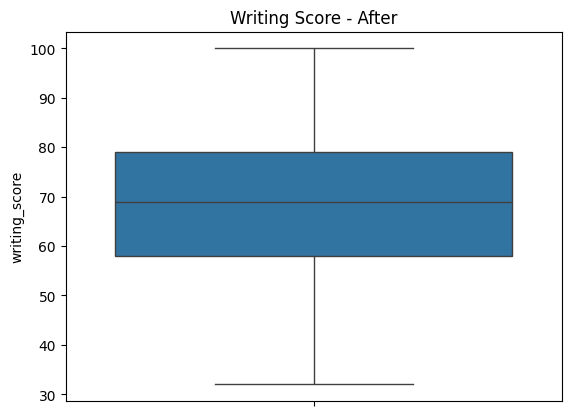

In [8]:
# 4. Outlier Detection – After Removal (Boxplots)
sns.boxplot(data=df["math_score"], ).set_title("Math Score - After")
plt.show()
sns.boxplot(data=df["reading_score"], ).set_title("Reading Score - After")
plt.show()
sns.boxplot(data=df["writing_score"], ).set_title("Writing Score - After")
plt.show()

In [9]:
df.dtypes

gender           object
race             object
parent_edu       object
lunch            object
test_course      object
math_score        int64
reading_score     int64
writing_score     int64
dtype: object

In [ ]:
# 5. Label Encoding of Categorical Variables
encoder = LabelEncoder()
df["gender_enc"] = encoder.fit_transform(df["gender"])
df["race_enc"] = encoder.fit_transform(df["race"])
df["parent_edu_enc"] = encoder.fit_transform(df["parent_edu"])
df["lunch_enc"] = encoder.fit_transform(df["lunch"])
df["test_course_enc"] = encoder.fit_transform(df["test_course"])

# Data Transformation Techniques
- The process of converting data from its original format into a more suitable format for analysis or modeling.
- Helps improve model performance and data interpretability.

## Types of Data Transformation Techniques

### 1. **Normalization**
- Also called Min-Max Scaling.
- Scales data to a fixed range, usually [0, 1].
- Formula:  
  `(X - min(X)) / (max(X) - min(X))`
- Affected by outliers.
- Use when data needs to be scaled to a specific range.

### 2. **Standardization**
- Also called Z-score normalization.
- Transforms data to have mean = 0 and standard deviation = 1.
- Formula:  
  `(X - mean(X)) / std(X)`
- Less sensitive to outliers than Min-Max.
- Useful when data follows a Gaussian (normal) distribution.

### 3. **Log Transformation**
- Applies log to compress large values and expand small ones.
- Helps reduce right skewness.
- Formula:  
  `log(X + 1)` (Adding 1 to avoid log(0))
- Useful when data has exponential growth.

### 4. **Square Root Transformation**
- Similar to log, reduces right skewness.
- Formula:  
  `sqrt(X)`
- Works for count-based data like number o

## Encoding Categorical Data (Data Transformation of Categorical Features)

### 1. **Label Encoding**
- Converts categories to integers.
- E.g., Male = 0, Female = 1
- Used for ordinal data (ordered categories).

### 2. **One-Hot Encoding**
- Creates binary columns for each category.
- E.g., Gender → Male, Female → [1, 0] or [0, 1]
- Suitable for nominal data (unordered categories).

## When to Use Which Technique?

| Situation                        | Suggested Technique        |
|----------------------------------|----------------------------|
| Features on different scales     | Min-Max or StandardScaler  |
| Data is skewed                   | Log / Sqrt / Power         |
| Count-based data                 | Square root / Log          |
| Ordinal categorical data         | Label Encoding             |
| Nominal categorical data         | One-Hot Encoding           |



In [ ]:
# 6. Data Transformation Techniques

# A. Min-Max Normalization
def min_max_normalize(feature):
    df[feature + "_minmax"] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

min_max_normalize("math_score")
min_max_normalize("reading_score")
min_max_normalize("writing_score")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select the columns you want to scale
features = ["math_score", "reading_score", "writing_score"]

# Fit and transform
df_minmax = scaler.fit_transform(df[features])
# Add back to original DataFrame with new column names

df[[f"{col}_minmax_new" for col in features]] = df_minmax

In [ ]:
# B. Z-score Standardization
def z_score_standardize(feature):
    mean = df[feature].mean()
    std = df[feature].std()
    df[feature + "_z"] = (df[feature] - mean) / std

z_score_standardize("math_score")
z_score_standardize("reading_score")
z_score_standardize("writing_score")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select the columns you want to scale
features = ["math_score", "reading_score", "writing_score"]

# Fit and transform
df_std = scaler.fit_transform(df[features])
# Add back to original DataFrame with new column names

df[[f"{col}_z_new" for col in features]] = df_std

In [ ]:
# C. Log Transformation
df["math_score_log"] = np.log1p(df["math_score"])
df["reading_score_log"] = np.log1p(df["reading_score"])
df["writing_score_log"] = np.log1p(df["writing_score"])

In [ ]:
# 7. Visualization of Transformed Data
sns.histplot(df["math_score_minmax"], kde=True, ).set_title("Min-Max Scaled Math")
plt.show()
sns.histplot(df["math_score_z"], kde=True, ).set_title("Z-score Scaled Math")
plt.show()
sns.histplot(df["math_score_log"], kde=True, ).set_title("Log Transformed Math")
plt.show()

In [ ]:
df.describe().round(2)